<a href="https://colab.research.google.com/github/sg758253/IDS/blob/main/HW4/problem1_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
#Import library
library(readr)
library(stringr)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# read csv
df <- read_csv("https://raw.githubusercontent.com/sg758253/IDS/main/HW4/adult_training.csv")
head(df)

Rows: 14797 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): workclass, marital_status, occupation, sex, income
dbl (4): age, education, capital_gain, capital_loss

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,workclass,education,marital_status,occupation,sex,capital_gain,capital_loss,income
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
40,Private,11,Married-civ-spouse,Craft-repair,Male,0,0,>50K


In [3]:
# column names
colnames(df)

[1] "age"            "workclass"      "education"      "marital_status"
[5] "occupation"     "sex"            "capital_gain"   "capital_loss"  
[9] "income"

In [4]:
# replacing ? with most comon values
df$workclass = str_replace(df$workclass,"\\?","Private")
df$occupation = str_replace(df$occupation,"\\?","Prof-specialty")

In [5]:
# checki null values
sum(is.na(df))

[1] 0

In [6]:
# summary of dataset
summary(df)

      age         workclass           education     marital_status    
 Min.   :17.00   Length:14797       Min.   : 1.00   Length:14797      
 1st Qu.:28.00   Class :character   1st Qu.: 9.00   Class :character  
 Median :37.00   Mode  :character   Median :10.00   Mode  :character  
 Mean   :38.69                      Mean   :10.07                     
 3rd Qu.:48.00                      3rd Qu.:12.00                     
 Max.   :90.00                      Max.   :16.00                     
  occupation            sex             capital_gain    capital_loss    
 Length:14797       Length:14797       Min.   :    0   Min.   :   0.00  
 Class :character   Class :character   1st Qu.:    0   1st Qu.:   0.00  
 Mode  :character   Mode  :character   Median :    0   Median :   0.00  
                                       Mean   : 1067   Mean   :  88.58  
                                       3rd Qu.:    0   3rd Qu.:   0.00  
                                       Max.   :99999   Max.   :43

# 2. Create a contingency table of workclass and sex, and plot it.

In [7]:
# contingency table for workclass and sex.
df_ct1 <- table(df$sex,df$workclass)
df_ct1

        
         Federal-gov Local-gov Never-worked Private Self-emp-inc
  Female         149       377            1    3951           54
  Male           305       592            4    7159          444
        
         Self-emp-not-inc State-gov Without-pay
  Female              178       201           1
  Male                992       385           4

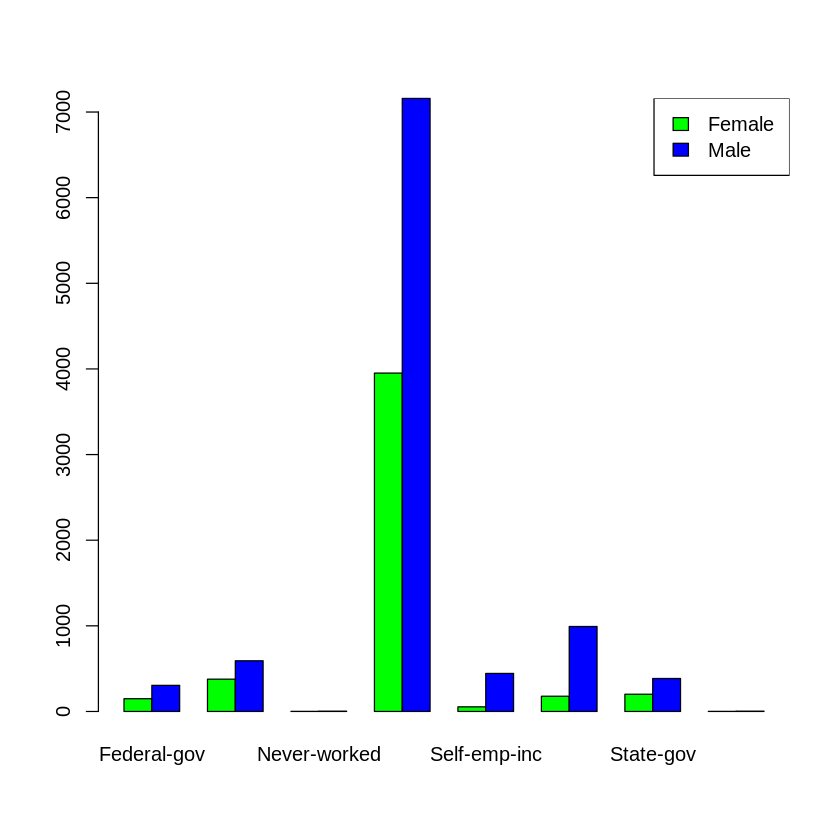

In [8]:
# contingency plot workclass and sex.
colors <- c("green", "blue")
barplot(df_ct1, col = colors, beside = TRUE)
legend("topright", legend = c("Female", "Male"), fill = colors)

#3.Create a contingency table of sex and marital status, and plot it.

In [9]:
# contingency table of marital status and sex.
df_ct2 <- table(df$sex,df$marital_status)
df_ct2

        
         Divorced Married-AF-spouse Married-civ-spouse Married-spouse-absent
  Female     1219                 7                761                    95
  Male        795                 4               6010                   104
        
         Never-married Separated Widowed
  Female          2160       290     380
  Male            2717       182      73

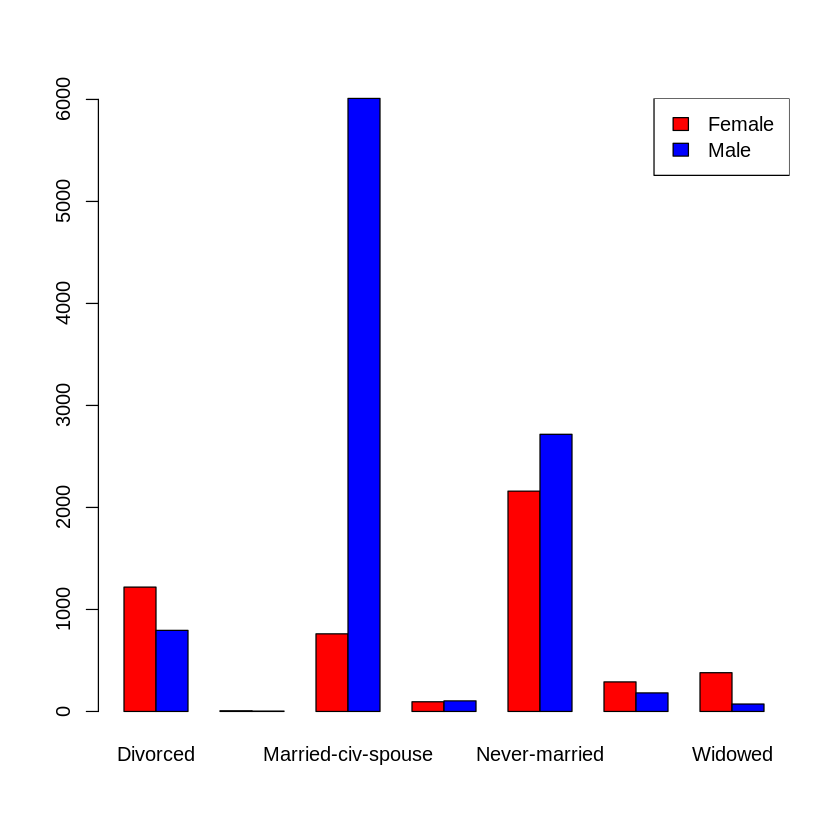

In [10]:
# contingency plot for workclass and sex.
colors <- c("red", "blue")
barplot(df_ct2, col = colors, beside = TRUE)
legend("topright", legend = c("Female", "Male"), fill = colors)

Married-spouse has the highest number of workers, while male ratio is higher than female.

# 4. Create a new data frame, adultOver40, for those whose age > 40.

In [11]:
# creating new dataframe for age>40
df_adultOver40<- subset(df,age>40)
head(df_adultOver40,10)

age,workclass,education,marital_status,occupation,sex,capital_gain,capital_loss,income
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K
54,Private,10,Married-civ-spouse,Prof-specialty,Male,0,0,>50K
44,Private,14,Divorced,Exec-managerial,Female,0,0,<=50K
50,Federal-gov,13,Divorced,Exec-managerial,Male,0,0,>50K
47,Self-emp-inc,9,Divorced,Exec-managerial,Male,0,0,<=50K
43,Private,10,Married-civ-spouse,Tech-support,Male,0,0,>50K


# 5. Recreate the contingency table of sex and marital status for adultOver40.

In [12]:
# contingency table of marital status and sex.
df_ct3 <- table(df$sex,df$marital_status)
df_ct3

        
         Divorced Married-AF-spouse Married-civ-spouse Married-spouse-absent
  Female     1219                 7                761                    95
  Male        795                 4               6010                   104
        
         Never-married Separated Widowed
  Female          2160       290     380
  Male            2717       182      73

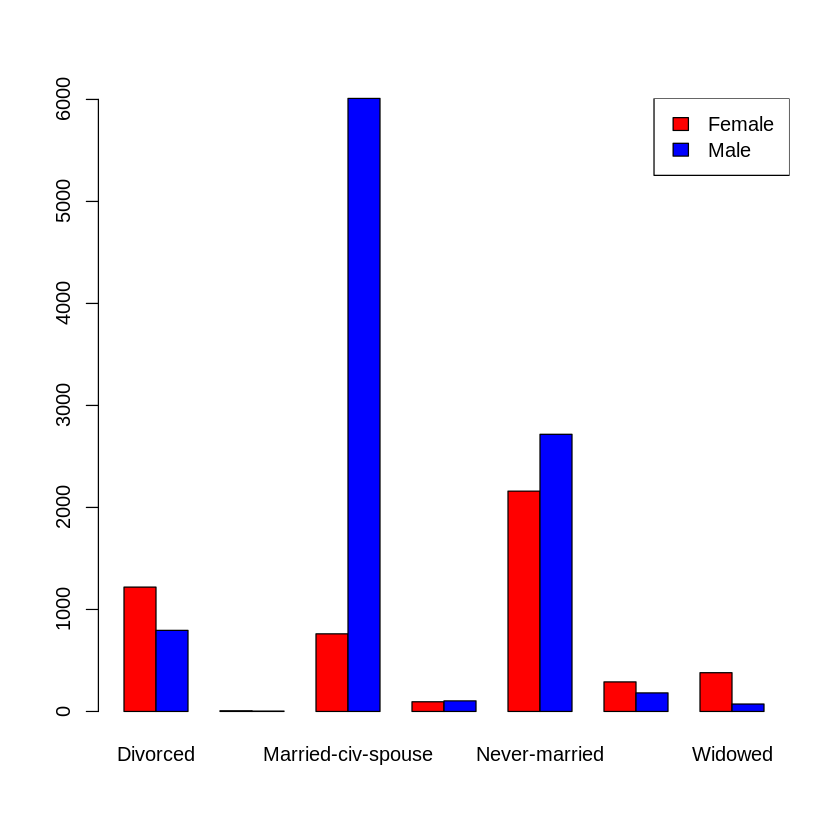

In [13]:
# contingency plot for workclass and sex.
colors <- c("red", "blue")
barplot(df_ct3, col = colors, beside = TRUE)
legend("topright", legend = c("Female", "Male"), fill = colors)

# 6. Determine whether any outliers exist for the education field.

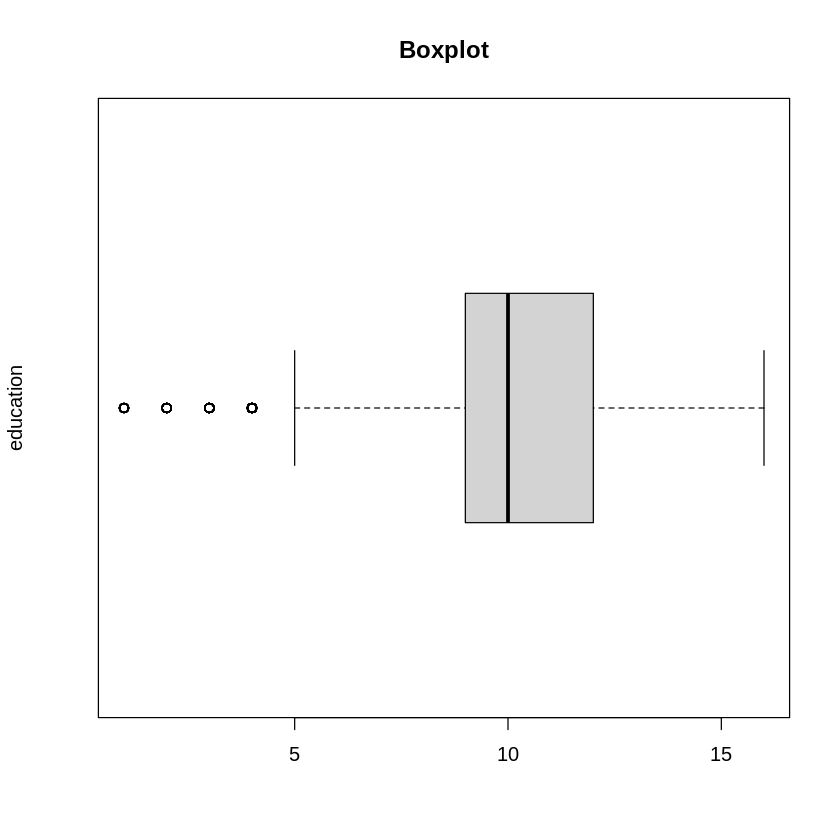

In [14]:
boxplot(df$education,ylab = "education",main = "Boxplot",horizontal = TRUE)

In [20]:
mean = mean(df$education)
std = sd(df$education)
df['education1'] = (df$education-mean)/std
head(df)

age,workclass,education,marital_status,occupation,sex,capital_gain,capital_loss,income,education1
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,1.1281245
38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K,-0.4113455
49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K,-1.9508155
52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K,-0.4113455
31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K,1.5129920
40,Private,11,Married-civ-spouse,Craft-repair,Male,0,0,>50K,0.3583895


In [48]:
# finding upper and lower bound
q1 <- quantile(df$education1,0.25)
q3 <- quantile(df$education1,0.75)
IQR <- q3-q1
lower_bound<-q1-(1.5 * IQR)
upper_bound<-q3 +(1.5 * IQR)
print(lower_bound)
print(upper_bound)

      25% 
-2.143249 
     75% 
2.475161 


In [49]:
df_edu <- df[(df$education1<lower_bound) | (df$education1> upper_bound),]
count(df_edu)

n
<int>
552


Result shows that there are 552 outliers in dataset.

# 7. Standardize (zero mean) the age variable, and identify how many outliers there are. What is the most extreme outlier?

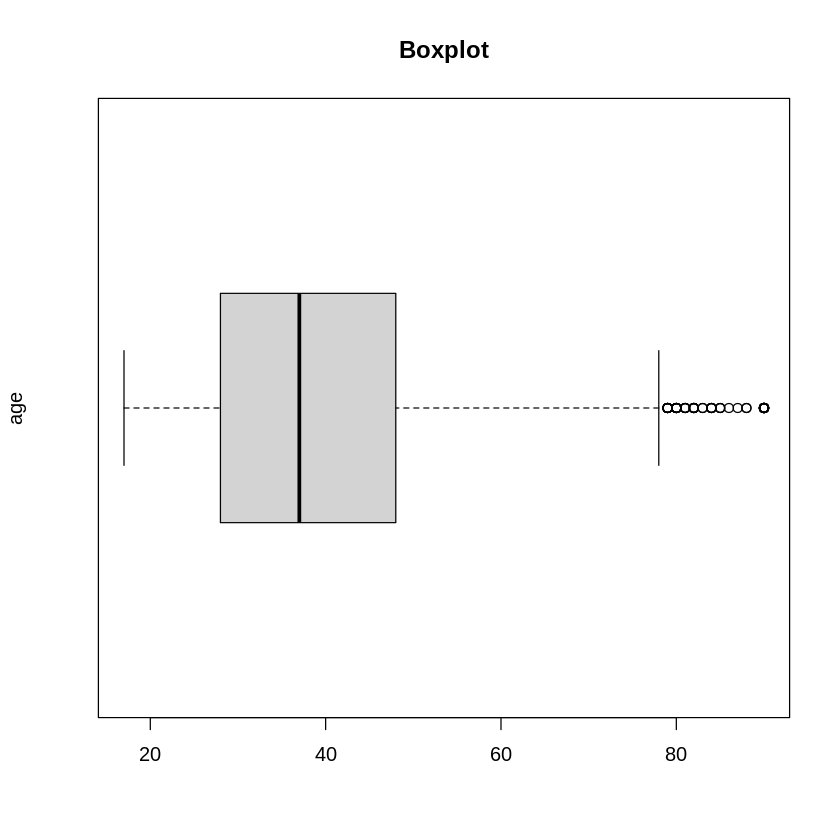

In [50]:
boxplot(df$age,ylab = "age",main = "Boxplot",horizontal = TRUE)

In [51]:
mean = mean(df$age)
std = sd(df$age)
df['age1'] = (df$age-mean)/std
head(df)

age,workclass,education,marital_status,occupation,sex,capital_gain,capital_loss,income,education1,age1
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,1.1281245,0.82700980
38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K,-0.4113455,-0.05025535
49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K,-1.9508155,0.75390437
52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K,-0.4113455,0.97322066
31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K,1.5129920,-0.56199336
40,Private,11,Married-civ-spouse,Craft-repair,Male,0,0,>50K,0.3583895,0.09595551


In [52]:
# finding upper and lower bound
q1 <- quantile(df$age1,0.25)
q3 <- quantile(df$age1,0.75)
IQR <- q3-q1
lower_bound<-q1-(1.5 * IQR)
upper_bound<-q3 +(1.5 * IQR)
print(lower_bound)
print(upper_bound)

      25% 
-2.974473 
     75% 
2.873962 


In [54]:
df_age <- df[(df$age1> upper_bound),]
count(df_age)

n
<int>
70


There are 70 outliers at high end.

# 8. Age anomaly? Select only records with age at least 80, and construct a histogram of age. Explain what you see.

In [55]:
df_aducltAbove80<- subset(df,age>80)
head(df_aducltAbove80)

age,workclass,education,marital_status,occupation,sex,capital_gain,capital_loss,income,education1,age1
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
90,Private,9,Never-married,Other-service,Male,0,2206,<=50K,-0.41134550,3.751227
90,Private,9,Never-married,Other-service,Female,0,0,<=50K,-0.41134550,3.751227
88,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,Male,0,0,<=50K,1.89785947,3.605016
90,Private,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,1.12812448,3.751227
90,Private,10,Never-married,Other-service,Male,0,0,<=50K,-0.02647801,3.751227
82,Private,4,Widowed,Prof-specialty,Male,0,0,<=50K,-2.33568298,3.166384


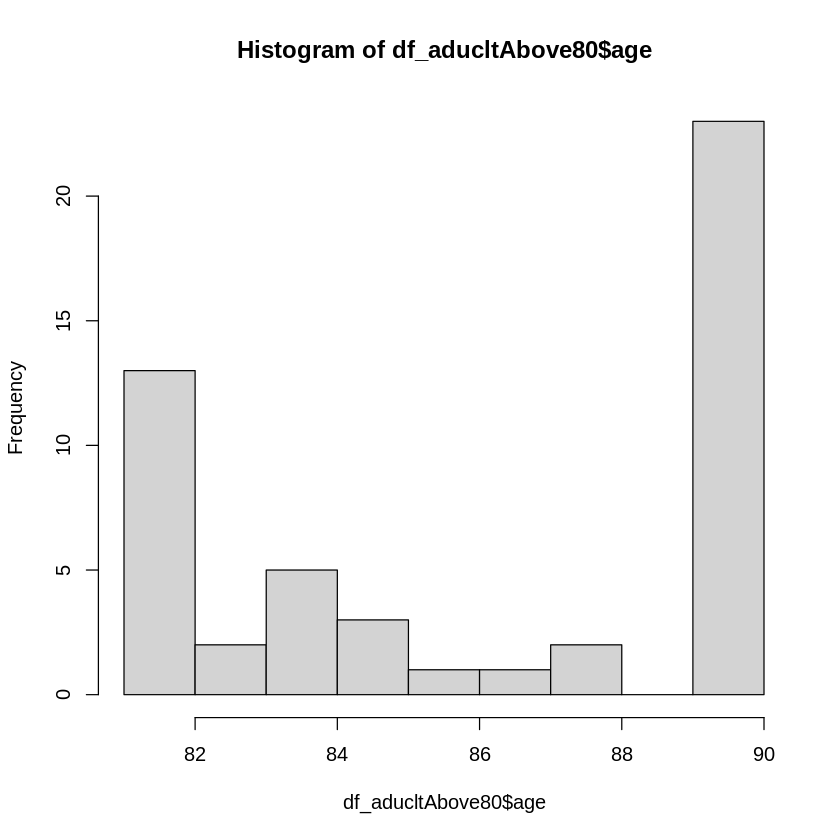

In [ ]:
#Plotting histogram for Age
hist(df_aducltAbove80$age)

**Summary**

1. The initial cross tabulation of workclass and sex revealed that the dataset contains more males than females, and that the vast majority of those sampled work in the private sector.
2. The cross tabulation for marital status and sex revealed that the majority of men are in the Married-Civ-Spouse.
3. There are 552 education outlier present.
4. There are 70 outliers present at high end of age outlier.